## Init

In [1]:
class IndexTracker(object):
    def __init__(self, ax, X):
        self.ax = ax
        ax.set_title('Geometry Viewer')

        self.X = X
        rows, cols, self.slices = X.shape
        self.ind = self.slices//2
        
        ss = rows*8/512

        self.im = ax.imshow(self.X[:, :, self.ind],cmap='bone',aspect='equal',extent=[-ss,ss,-ss,ss])
        self.update()

    def onscroll(self, event):
        #print("%s %s" % (event.button, event.step))
        if event.button == 'up':
            self.ind = (self.ind + 1) % self.slices
        else:
            self.ind = (self.ind - 1) % self.slices
        self.update()

    def update(self):
        self.im.set_data(self.X[:, :, self.ind])
#         self.ax.set_ylabel('slice %s' % self.ind)
        self.im.axes.figure.canvas.draw()

In [2]:
%pylab nbagg

Populating the interactive namespace from numpy and matplotlib


## Comparison

In [3]:
0.0007936554175103083/4

0.00019841385437757708

In [4]:
topas = np.load('projs_new_npys.npy')

# for figures W25CWOcoh_working.npy
fastCat = np.load('/home/xcite/fastCAT/xpecgen/data/projs/similar_noise7.npy')#fastCat_topas_equiv_8cm_W.npy')

<IPython.core.display.Javascript object>


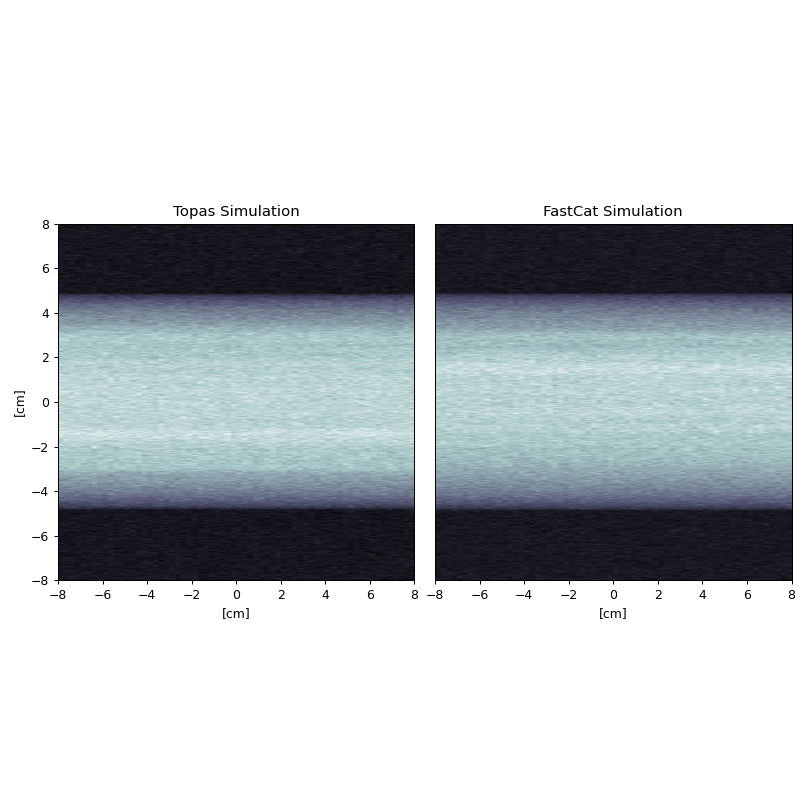

In [5]:
fig = plt.figure(figsize=[9,9])

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

pad = 5

tracker1 = IndexTracker(ax1, topas.T[:,:64,:64])#transpose([0,2,1]))
tracker2 = IndexTracker(ax2, fastCat.T[:,:,:])


fig.canvas.mpl_connect('scroll_event', tracker2.onscroll)
fig.canvas.mpl_connect('scroll_event', tracker1.onscroll)
ax1.set_title('Topas Simulation')
ax1.set_xlabel('[cm]')
ax2.set_xlabel('[cm]')
ax1.set_ylabel('[cm]')
# ax2.set_ylabel('[cm]')
ax2.set_yticks([])
plt.title('FastCat Simulation')
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


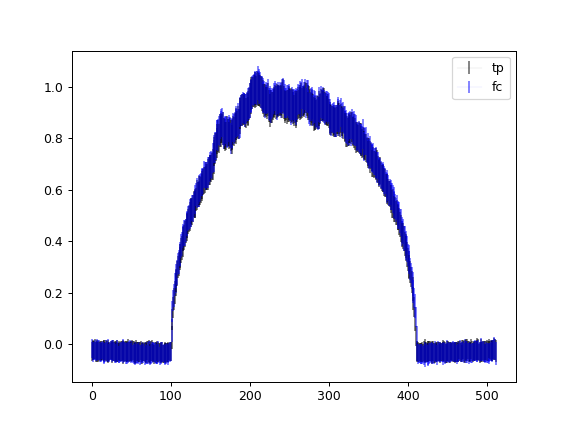

/home/xcite/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  """
/home/xcite/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  


In [6]:
plt.figure()

for ii in range(512):
    
    plt.errorbar(ii,np.mean(topas.T[ii,:,0]),yerr=np.std(topas.T[ii,:,0]),fmt='k',lineWidth= 0.1,alpha=0.5)
    plt.errorbar(ii,np.mean(fastCat.T[ii,:,0])/10,yerr=np.std(topas.T[ii,:,0]),fmt='b',lineWidth= 0.1,alpha=0.5)

plt.legend(['tp','fc'])

<IPython.core.display.Javascript object>


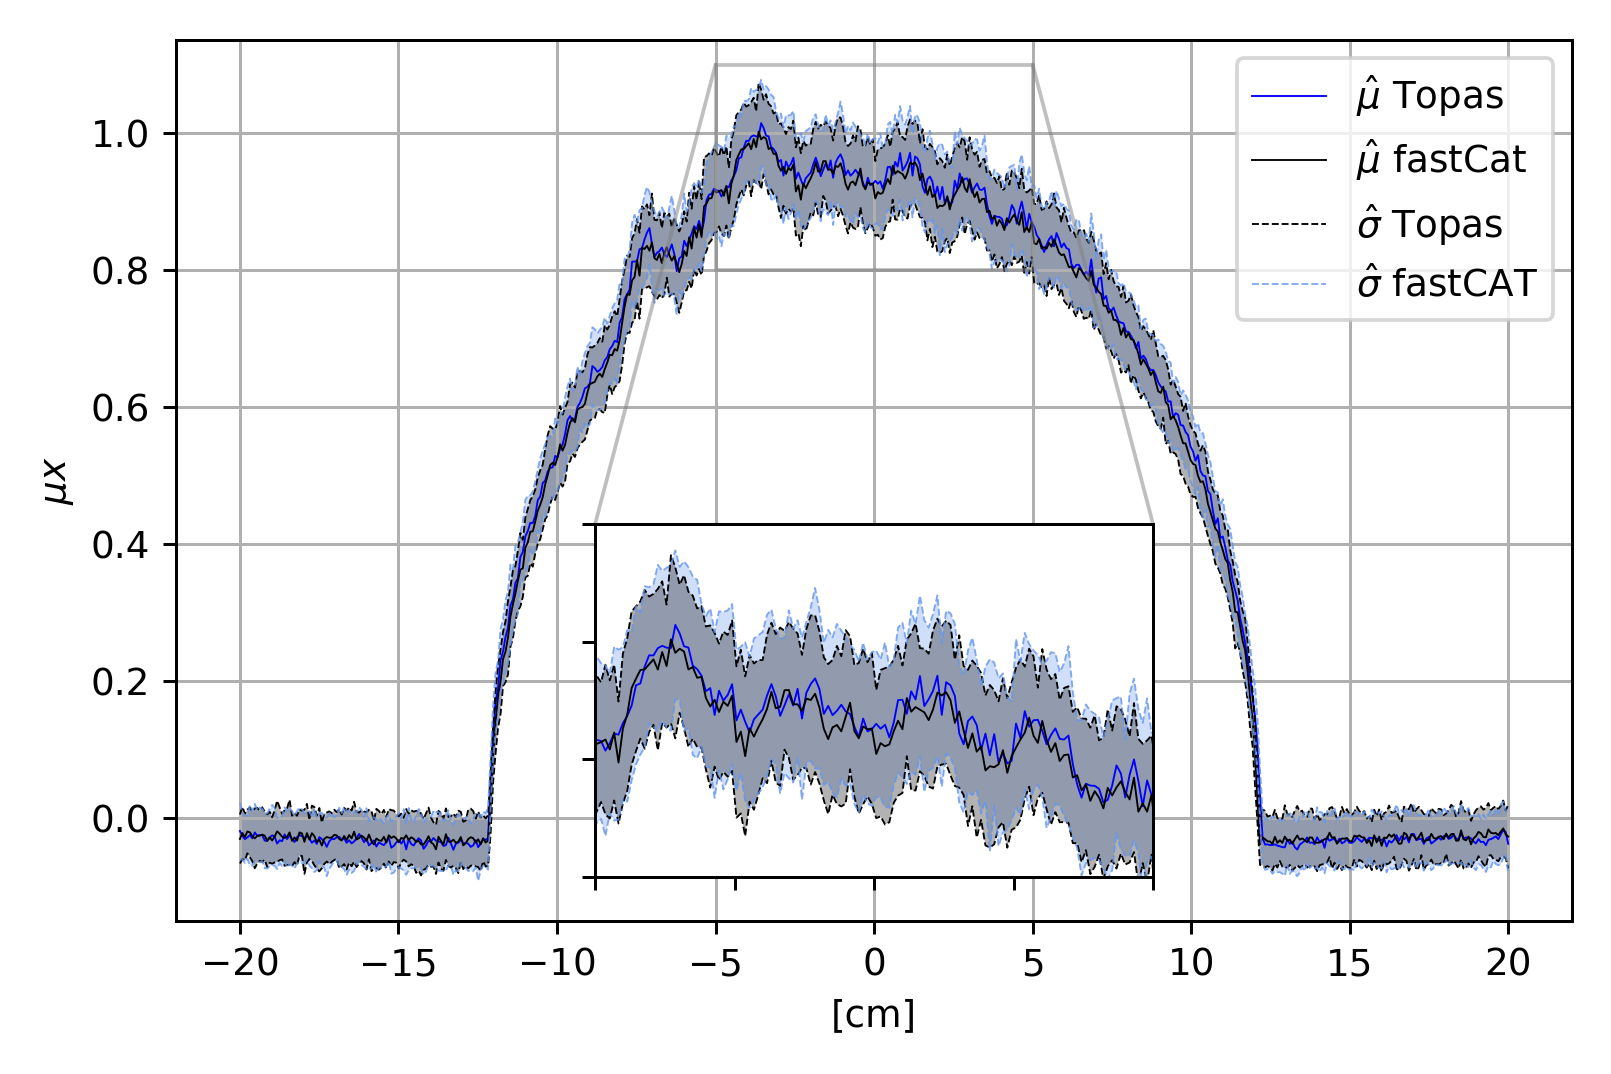

/home/xcite/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  # Remove the CWD from sys.path while we load stuff.
/home/xcite/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  # This is added back by InteractiveShellApp.init_path()
/home/xcite/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  del sys.path[0]
/home/xcite/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  from ipykernel import kernel

(<matplotlib.patches.Rectangle at 0x7fa27a1c2190>,
 (<matplotlib.patches.ConnectionPatch at 0x7fa2790b1950>,
  <matplotlib.patches.ConnectionPatch at 0x7fa2790b1ad0>))

In [7]:
fig = plt.figure(figsize=[6,4],dpi=300)

ax = fig.add_subplot(111)

plt.fill_between(np.linspace(-20,20,512),np.mean(fastCat.T[:,:,0],1)/10-np.std(fastCat.T[:,:,0],1)/10, 
                 np.mean(fastCat.T[:,:,0],1)/10+np.std(fastCat.T[:,:,0],1)/10 ,alpha=0.3, facecolor='cornflowerblue')

plt.fill_between(np.linspace(-20,20,512),np.mean(topas.T[:,:64,0],1)-np.std(topas.T[:,:64,0],1),
                 np.mean(topas.T[:,:64,0],1)+np.std(topas.T[:,:64,0],1),alpha=0.3, facecolor='k')
plt.plot(np.linspace(-20,20,512),np.mean(fastCat.T[:,:,0],1)/10,lineWidth= .5,color='b')
plt.plot(np.linspace(-20,20,512),np.mean(topas.T[:,:64,0],1),lineWidth= .5,color='k')
    
plt.plot(np.linspace(-20,20,512),np.mean(topas.T[:,:64,0],1)+np.std(topas.T[:,:64,0],1),'k--',lineWidth= .5)

plt.plot(np.linspace(-20,20,512),np.mean(fastCat.T[:,:,0],1)/10+np.std(fastCat.T[:,:,0],1)/10,'--',lineWidth= .5,color='cornflowerblue',alpha=0.8)

plt.plot(np.linspace(-20,20,512),np.mean(topas.T[:,:64,0],1)-np.std(topas.T[:,:64,0],1),'k--',lineWidth= .5)

plt.plot(np.linspace(-20,20,512),np.mean(fastCat.T[:,:,0],1)/10-np.std(fastCat.T[:,:,0],1)/10,'--',lineWidth= .5,color='cornflowerblue',alpha=0.8)

plt.legend(['$\hat{\mu}$ Topas','$\hat{\mu}$ fastCat', '$\hat{\sigma}$ Topas', '$\hat{\sigma}$ fastCAT'])
            

# inset axes....
axins = ax.inset_axes([0.3, 0.05, 0.4, 0.4])

axins.fill_between(np.linspace(-20,20,512),np.mean(fastCat.T[:,:,0],1)/10-np.std(fastCat.T[:,:,0],1)/10, 
                 np.mean(fastCat.T[:,:,0],1)/10+np.std(fastCat.T[:,:,0],1)/10 ,alpha=0.3, facecolor='cornflowerblue')

axins.fill_between(np.linspace(-20,20,512),np.mean(topas.T[:,:64,0],1)-np.std(topas.T[:,:64,0],1),
                 np.mean(topas.T[:,:64,0],1)+np.std(topas.T[:,:64,0],1),alpha=0.3, facecolor='k')

axins.plot(np.linspace(-20,20,512),np.mean(topas.T[:,:64,0],1)+np.std(topas.T[:,:64,0],1),'k--',lineWidth= .5)

axins.plot(np.linspace(-20,20,512),np.mean(fastCat.T[:,:,0],1)/10+np.std(fastCat.T[:,:,0],1)/10,'--',lineWidth= .5,color='cornflowerblue',alpha=0.8)

axins.plot(np.linspace(-20,20,512),np.mean(topas.T[:,:64,0],1)-np.std(topas.T[:,:64,0],1),'k--',lineWidth= .5)

axins.plot(np.linspace(-20,20,512),np.mean(fastCat.T[:,:,0],1)/10-np.std(fastCat.T[:,:,0],1)/10,'--',lineWidth= .5,color='cornflowerblue',alpha=0.8)

axins.plot(np.linspace(-20,20,512),np.mean(fastCat.T[:,:,0],1)/10,lineWidth= .5,color='b')
axins.plot(np.linspace(-20,20,512),np.mean(topas.T[:,:64,0],1),lineWidth= .5,color='k')

plt.grid()
# sub region of the original image
x1, x2, y1, y2 = -5, 5, 0.8, 1.1
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.set_xticklabels('')
axins.set_yticklabels('')

plt.ylabel('$\mu x$')
plt.xlabel('[cm]')
plt.tight_layout()

ax.indicate_inset_zoom(axins)

In [183]:
plt.savefig('/home/xcite/fastcat_paper/figures/noisy_line.pdf')

## Analyse script

In [156]:
import astropy.stats as stats

In [157]:
    def analyse_515(recon_slice):

        def create_mask(shape):

            im = np.zeros(shape)
            ii = 1

            # CTMAT(x) formel=H2O dichte=x
            LEN = 100

            A0  = 87.7082*np.pi/180
            A1 = 108.3346*np.pi/180
            A2 = 126.6693*np.pi/180
            A3 = 142.7121*np.pi/180
            A4 = 156.4631*np.pi/180
            A5 = 167.9223*np.pi/180
            A6 = 177.0896*np.pi/180
            A7 = 183.9651*np.pi/180
            A8 = 188.5487*np.pi/180

            B0 = 110.6265*np.pi/180
            B1 = 142.7121*np.pi/180
            B2 = 165.6304*np.pi/180
            B3 = 179.3814*np.pi/180

            tad = 0.2

            # Phantom 
            # ++++ module body ++++++++++++++++++++++++++++++++++++++++++++++++++ */                        
            create_circular_mask(x= 0.000,  y= 0.000,  r=-tad + 2.0, index = ii, image = im)

            ii += 1

            # ++++ supra-slice 1.0% targets +++++++++++++++++++++++++++++++++++++++ */
            create_circular_mask(x= 5*cos(A0),  y= 5*sin(A0),  r=-tad + 0.75, index = ii, image = im); ii += 1
            create_circular_mask(x= 5*cos(A1),  y= 5*sin(A1),  r=-tad + 0.45, index = ii, image = im); ii += 1
            create_circular_mask(x= 5*cos(A2),  y= 5*sin(A2),  r=-tad + 0.40, index = ii, image = im); ii += 1
            create_circular_mask(x= 5*cos(A3),  y= 5*sin(A3),  r=-tad + 0.35, index = ii, image = im); ii += 1
            create_circular_mask(x= 5*cos(A4),  y= 5*sin(A4),  r=-tad + 0.30, index = ii, image = im); ii += 1
            create_circular_mask(x= 5*cos(A5),  y= 5*sin(A5),  r=-tad + 0.25, index = ii, image = im); ii += 1
            create_circular_mask(x= 5*cos(A6),  y= 5*sin(A6),  r=-tad + 0.20, index = ii, image = im); ii += 1
            create_circular_mask(x= 5*cos(A7),  y= 5*sin(A7),  r=-tad + 0.15, index = ii, image = im); ii += 1
            create_circular_mask(x= 5*cos(A8),  y= 5*sin(A8),  r=-tad + 0.10, index = ii, image = im); ii += 1


            # ++++ supra-slice 0.3% targets +++++++++++++++++++++++++++++++++++++++ */
            create_circular_mask(x= 5*cos(A0+2/3*np.pi),  y= 5*sin(A0+2/3*np.pi),  r=-tad + 0.75, index = ii, image = im); ii += 1
            create_circular_mask(x= 5*cos(A1+2/3*np.pi),  y= 5*sin(A1+2/3*np.pi),  r=-tad + 0.45, index = ii, image = im); ii += 1
            create_circular_mask(x= 5*cos(A2+2/3*np.pi),  y= 5*sin(A2+2/3*np.pi),  r=-tad + 0.40, index = ii, image = im); ii += 1
            create_circular_mask(x= 5*cos(A3+2/3*np.pi),  y= 5*sin(A3+2/3*np.pi),  r=-tad + 0.35, index = ii, image = im); ii += 1
            create_circular_mask(x= 5*cos(A4+2/3*np.pi),  y= 5*sin(A4+2/3*np.pi),  r=-tad + 0.30, index = ii, image = im); ii += 1
            create_circular_mask(x= 5*cos(A5+2/3*np.pi),  y= 5*sin(A5+2/3*np.pi),  r=-tad + 0.25, index = ii, image = im); ii += 1
            create_circular_mask(x= 5*cos(A6+2/3*np.pi),  y= 5*sin(A6+2/3*np.pi),  r=-tad + 0.20, index = ii, image = im); ii += 1
            create_circular_mask(x= 5*cos(A7+2/3*np.pi),  y= 5*sin(A7+2/3*np.pi),  r=-tad + 0.15, index = ii, image = im); ii += 1
            create_circular_mask(x= 5*cos(A8+2/3*np.pi),  y= 5*sin(A8+2/3*np.pi),  r=-tad + 0.10, index = ii, image = im); ii += 1


            # ++++ supra-slice 0.5% targets +++++++++++++++++++++++++++++++++++++++ */
            create_circular_mask(x= 5*cos(A0+4/3*np.pi),  y= 5*sin(A0+4/3*np.pi),  r=-tad + 0.75, index = ii, image = im); ii += 1
            create_circular_mask(x= 5*cos(A1+4/3*np.pi),  y= 5*sin(A1+4/3*np.pi),  r=-tad + 0.45, index = ii, image = im); ii += 1
            create_circular_mask(x= 5*cos(A2+4/3*np.pi),  y= 5*sin(A2+4/3*np.pi),  r=-tad + 0.40, index = ii, image = im); ii += 1
            create_circular_mask(x= 5*cos(A3+4/3*np.pi),  y= 5*sin(A3+4/3*np.pi),  r=-tad + 0.35, index = ii, image = im); ii += 1
            create_circular_mask(x= 5*cos(A4+4/3*np.pi),  y= 5*sin(A4+4/3*np.pi),  r=-tad + 0.30, index = ii, image = im); ii += 1
            create_circular_mask(x= 5*cos(A5+4/3*np.pi),  y= 5*sin(A5+4/3*np.pi),  r=-tad + 0.25, index = ii, image = im); ii += 1
            create_circular_mask(x= 5*cos(A6+4/3*np.pi),  y= 5*sin(A6+4/3*np.pi),  r=-tad + 0.20, index = ii, image = im); ii += 1
            create_circular_mask(x= 5*cos(A7+4/3*np.pi),  y= 5*sin(A7+4/3*np.pi),  r=-tad + 0.15, index = ii, image = im); ii += 1
            create_circular_mask(x= 5*cos(A8+4/3*np.pi),  y= 5*sin(A8+4/3*np.pi),  r=-tad + 0.10, index = ii, image = im); ii += 1

            # ++++ subslice 1.0% targets 7mm long +++++++++++++++++++++++++++++++++ */
            create_circular_mask(x= 2.5*cos(B0),  y= 2.5*sin(B0),  r=-tad + 0.45, index = ii, image = im); ii += 1
            create_circular_mask(x= 2.5*cos(B1),  y= 2.5*sin(B1),  r=-tad + 0.35, index = ii, image = im); ii += 1
            create_circular_mask(x= 2.5*cos(B2),  y= 2.5*sin(B2),  r=-tad + 0.25, index = ii, image = im); ii += 1
            create_circular_mask(x= 2.5*cos(B3),  y= 2.5*sin(B3),  r=-tad + 0.15, index = ii, image = im); ii += 1


            # ++++ subslice 1.0% targets 3mm long +++++++++++++++++++++++++++++++++ */
            create_circular_mask(x= 2.5*cos(B0+2/3*np.pi) ,y= 2.5*sin(B0+2/3*np.pi),  r=-tad + 0.45  , index = ii, image = im); ii += 1
            create_circular_mask(x= 2.5*cos(B1+2/3*np.pi) ,y= 2.5*sin(B1+2/3*np.pi),  r=-tad + 0.35  , index = ii, image = im); ii += 1
            create_circular_mask(x= 2.5*cos(B2+2/3*np.pi) ,y= 2.5*sin(B2+2/3*np.pi),  r=-tad + 0.25  , index = ii, image = im); ii += 1
            create_circular_mask(x= 2.5*cos(B3+2/3*np.pi) ,y= 2.5*sin(B3+2/3*np.pi),  r=-tad + 0.15  , index = ii, image = im); ii += 1


            # ++++ subslice 1.0% targets 5mm long +++++++++++++++++++++++++++++++++ */
            create_circular_mask(x= 2.5*cos(B0+4/3*np.pi) ,y= 2.5*sin(B0+4/3*np.pi),  r=-tad + 0.45  , index = ii, image = im); ii += 1
            create_circular_mask(x= 2.5*cos(B1+4/3*np.pi) ,y= 2.5*sin(B1+4/3*np.pi),  r=-tad + 0.35  , index = ii, image = im); ii += 1
            create_circular_mask(x= 2.5*cos(B2+4/3*np.pi) ,y= 2.5*sin(B2+4/3*np.pi),  r=-tad + 0.25  , index = ii, image = im); ii += 1
            create_circular_mask(x= 2.5*cos(B3+4/3*np.pi) ,y= 2.5*sin(B3+4/3*np.pi),  r=-tad + 0.15  , index = ii, image = im); ii += 1

            return im

        def create_mask_multi(shape):

            im = np.zeros(shape)
            ii = 1

            # CTMAT(x) formel=H2O dichte=x
            LEN = 100

            A0  = 87.7082*np.pi/180
            A1 = 108.3346*np.pi/180
            A2 = 126.6693*np.pi/180
            A3 = 142.7121*np.pi/180
            A4 = 156.4631*np.pi/180
            A5 = 167.9223*np.pi/180
            A6 = 177.0896*np.pi/180
            A7 = 183.9651*np.pi/180
            A8 = 188.5487*np.pi/180
            B0 = 110.6265*np.pi/180
            B1 = 142.7121*np.pi/180
            B2 = 165.6304*np.pi/180
            B3 = 179.3814*np.pi/180

            # Phantom 
            # ++++ module body ++++++++++++++++++++++++++++++++++++++++++++++++++ */                        
            create_circular_mask(x= 0.000,  y= 0.000,  r=1.5, index = ii, image = im)

            ii += 1

            tad = 0.2
            # ++++ supra-slice 1.0% targets +++++++++++++++++++++++++++++++++++++++ */

            create_circular_mask(x= 5*cos(A0),  y= 5*sin(A0),  r=0.75 - tad, index = ii, image = im); ii += 1
            create_circular_mask(x= 5*cos(A0+2/3*np.pi),  y= 5*sin(A0+2/3*np.pi),  r=0.75 - tad, index = ii, image = im); ii += 1
            create_circular_mask(x= 5*cos(A0+4/3*np.pi),  y= 5*sin(A0+4/3*np.pi),  r=0.75 - tad, index = ii, image = im); ii += 1

            create_circular_mask(x= 2.5*cos(B0),  y= 2.5*sin(B0),  r=0.45 - tad, index = ii, image = im); ii += 1
            create_circular_mask(x= 2.5*cos(B0+2/3*np.pi) ,y= 2.5*sin(B0+2/3*np.pi),  r=0.45 - tad  , index = ii, image = im); ii += 1
            create_circular_mask(x= 2.5*cos(B0+4/3*np.pi) ,y= 2.5*sin(B0+4/3*np.pi),  r=0.45 - tad  , index = ii, image = im); ii += 1       
            return im

        def create_circular_mask(x, y, r, index, image):
        
            h,w = image.shape
            
            center = [x*int(w/2)/8 + int(w/2),y*int(h/2)/8 + int(h/2)]

            if center is None: # use the middle of the image
                center = (int(w/2), int(h/2))
            if r is None: # use the smallest distance between the center and image walls
                radius = min(center[0], center[1], w-center[0], h-center[1])

            Y, X = np.ogrid[:h, :w]
            dist_from_center = np.sqrt((X - center[0])**2 + (Y-center[1])**2)

            mask = dist_from_center <= r*int(w/2)/8
            
            
            image[mask] = index

        im = create_mask(recon_slice.shape)

        contrast = []
        noise = []
        cnr = []

        ii = 1

        ref_mean = np.mean(recon_slice[im == ii])
        ref_std = np.std(recon_slice[im == ii])
        print(ref_mean)

        ci = []
        
        for ii in range(2,int(np.max(im)+1)):
            
            nsample = len(recon_slice[im == ii])
            
            if nsample > 2:
                
                noise.append(np.std(recon_slice[im == ii]))
                
                booted = np.abs(stats.bootstrap(recon_slice[im == ii],100,samples=int(nsample/5),bootfunc=np.mean) - ref_mean)

                ci.append(np.std(booted))
                contrast.append(np.mean(booted))

                cnr.append(contrast[-1]/(np.sqrt(noise[-1]**2)))
                      
        ci_v = [2*(ci[ii]/ref_mean)*100 for ii in range(len(ci))]
            
        rs = np.linspace(0.1,0.45,8)

        return_im = True

        if return_im:
            return rs, [(contrast[ii]/ref_mean)*100 for ii in range(len(contrast))], cnr, ci_v, im
        else:
            return rs, [(contrast[ii]/ref_mean)*100 for ii in range(len(contrast))], cnr, ci_v

In [158]:
    def analyse_515_8cm(recon_slice):

        def create_mask(shape):

            im = np.zeros(shape)
            ii = 1
            
            offset = 0.1
            
            first_radius = 5 - offset
            second_radius = 2.5 - offset
            
            correction = -2*np.pi/180
            # CTMAT(x) formel=H2O dichte=x
            LEN = 100

            A0  = 87.7082*np.pi/180 + correction
            A1 = 108.3346*np.pi/180 + correction
            A2 = 126.6693*np.pi/180 + correction
            A3 = 142.7121*np.pi/180 + correction
            A4 = 156.4631*np.pi/180 + correction
            A5 = 167.9223*np.pi/180 + correction
            A6 = 177.0896*np.pi/180 + correction
            A7 = 183.9651*np.pi/180 + correction
            A8 = 188.5487*np.pi/180 + correction

            B0 = 110.6265*np.pi/180 + correction
            B1 = 142.7121*np.pi/180 + correction
            B2 = 165.6304*np.pi/180 + correction
            B3 = 179.3814*np.pi/180 + correction

            tad = 0.2

            # Phantom 
            # ++++ module body ++++++++++++++++++++++++++++++++++++++++++++++++++ */                        
            create_circular_mask(x= 0.000,  y= 0.000,  r=-tad + 2, index = ii, image = im)

            ii += 1

            # ++++ supra-slice 1.0% targets +++++++++++++++++++++++++++++++++++++++ */
            create_circular_mask(x= first_radius*cos(A0),  y= first_radius*sin(A0),  r=-tad + 0.75, index = ii, image = im); ii += 1
            create_circular_mask(x= first_radius*cos(A1),  y= first_radius*sin(A1),  r=-tad + 0.45, index = ii, image = im); ii += 1
            create_circular_mask(x= first_radius*cos(A2),  y= first_radius*sin(A2),  r=-tad + 0.40, index = ii, image = im); ii += 1
            create_circular_mask(x= first_radius*cos(A3),  y= first_radius*sin(A3),  r=-tad + 0.35, index = ii, image = im); ii += 1
            create_circular_mask(x= first_radius*cos(A4),  y= first_radius*sin(A4),  r=-tad + 0.30, index = ii, image = im); ii += 1
            create_circular_mask(x= first_radius*cos(A5),  y= first_radius*sin(A5),  r=-tad + 0.25, index = ii, image = im); ii += 1
            create_circular_mask(x= first_radius*cos(A6),  y= first_radius*sin(A6),  r=-tad + 0.20, index = ii, image = im); ii += 1
            create_circular_mask(x= first_radius*cos(A7),  y= first_radius*sin(A7),  r=-tad + 0.15, index = ii, image = im); ii += 1
            create_circular_mask(x= first_radius*cos(A8),  y= first_radius*sin(A8),  r=-tad + 0.10, index = ii, image = im); ii += 1


            # ++++ supra-slice 0.3% targets +++++++++++++++++++++++++++++++++++++++ */
            create_circular_mask(x= first_radius*cos(A0+2/3*np.pi),  y= first_radius*sin(A0+2/3*np.pi),  r=-tad + 0.75, index = ii, image = im); ii += 1
            create_circular_mask(x= first_radius*cos(A1+2/3*np.pi),  y= first_radius*sin(A1+2/3*np.pi),  r=-tad + 0.45, index = ii, image = im); ii += 1
            create_circular_mask(x= first_radius*cos(A2+2/3*np.pi),  y= first_radius*sin(A2+2/3*np.pi),  r=-tad + 0.40, index = ii, image = im); ii += 1
            create_circular_mask(x= first_radius*cos(A3+2/3*np.pi),  y= first_radius*sin(A3+2/3*np.pi),  r=-tad + 0.35, index = ii, image = im); ii += 1
            create_circular_mask(x= first_radius*cos(A4+2/3*np.pi),  y= first_radius*sin(A4+2/3*np.pi),  r=-tad + 0.30, index = ii, image = im); ii += 1
            create_circular_mask(x= first_radius*cos(A5+2/3*np.pi),  y= first_radius*sin(A5+2/3*np.pi),  r=-tad + 0.25, index = ii, image = im); ii += 1
            create_circular_mask(x= first_radius*cos(A6+2/3*np.pi),  y= first_radius*sin(A6+2/3*np.pi),  r=-tad + 0.20, index = ii, image = im); ii += 1
            create_circular_mask(x= first_radius*cos(A7+2/3*np.pi),  y= first_radius*sin(A7+2/3*np.pi),  r=-tad + 0.15, index = ii, image = im); ii += 1
            create_circular_mask(x= first_radius*cos(A8+2/3*np.pi),  y= first_radius*sin(A8+2/3*np.pi),  r=-tad + 0.10, index = ii, image = im); ii += 1


            # ++++ supra-slice 0.5% targets +++++++++++++++++++++++++++++++++++++++ */
            create_circular_mask(x= first_radius*cos(A0+4/3*np.pi),  y= first_radius*sin(A0+4/3*np.pi),  r=-tad + 0.75, index = ii, image = im); ii += 1
            create_circular_mask(x= first_radius*cos(A1+4/3*np.pi),  y= first_radius*sin(A1+4/3*np.pi),  r=-tad + 0.45, index = ii, image = im); ii += 1
            create_circular_mask(x= first_radius*cos(A2+4/3*np.pi),  y= first_radius*sin(A2+4/3*np.pi),  r=-tad + 0.40, index = ii, image = im); ii += 1
            create_circular_mask(x= first_radius*cos(A3+4/3*np.pi),  y= first_radius*sin(A3+4/3*np.pi),  r=-tad + 0.35, index = ii, image = im); ii += 1
            create_circular_mask(x= first_radius*cos(A4+4/3*np.pi),  y= first_radius*sin(A4+4/3*np.pi),  r=-tad + 0.30, index = ii, image = im); ii += 1
            create_circular_mask(x= first_radius*cos(A5+4/3*np.pi),  y= first_radius*sin(A5+4/3*np.pi),  r=-tad + 0.25, index = ii, image = im); ii += 1
            create_circular_mask(x= first_radius*cos(A6+4/3*np.pi),  y= first_radius*sin(A6+4/3*np.pi),  r=-tad + 0.20, index = ii, image = im); ii += 1
            create_circular_mask(x= first_radius*cos(A7+4/3*np.pi),  y= first_radius*sin(A7+4/3*np.pi),  r=-tad + 0.15, index = ii, image = im); ii += 1
            create_circular_mask(x= first_radius*cos(A8+4/3*np.pi),  y= first_radius*sin(A8+4/3*np.pi),  r=-tad + 0.10, index = ii, image = im); ii += 1

            # ++++ subslice 1.0% targets 7mm long +++++++++++++++++++++++++++++++++ */
            create_circular_mask(x= second_radius*cos(B0),  y= second_radius*sin(B0),  r=-tad + 0.45, index = ii, image = im); ii += 1
            create_circular_mask(x= second_radius*cos(B1),  y= second_radius*sin(B1),  r=-tad + 0.35, index = ii, image = im); ii += 1
            create_circular_mask(x= second_radius*cos(B2),  y= second_radius*sin(B2),  r=-tad + 0.25, index = ii, image = im); ii += 1
            create_circular_mask(x= second_radius*cos(B3),  y= second_radius*sin(B3),  r=-tad + 0.15, index = ii, image = im); ii += 1


            # ++++ subslice 1.0% targets 3mm long +++++++++++++++++++++++++++++++++ */
            create_circular_mask(x= second_radius*cos(B0+2/3*np.pi) ,y= second_radius*sin(B0+2/3*np.pi),  r=-tad + 0.45  , index = ii, image = im); ii += 1
            create_circular_mask(x= second_radius*cos(B1+2/3*np.pi) ,y= second_radius*sin(B1+2/3*np.pi),  r=-tad + 0.35  , index = ii, image = im); ii += 1
            create_circular_mask(x= second_radius*cos(B2+2/3*np.pi) ,y= second_radius*sin(B2+2/3*np.pi),  r=-tad + 0.25  , index = ii, image = im); ii += 1
            create_circular_mask(x= second_radius*cos(B3+2/3*np.pi) ,y= second_radius*sin(B3+2/3*np.pi),  r=-tad + 0.15  , index = ii, image = im); ii += 1


            # ++++ subslice 1.0% targets 5mm long +++++++++++++++++++++++++++++++++ */
            create_circular_mask(x= second_radius*cos(B0+4/3*np.pi) ,y= second_radius*sin(B0+4/3*np.pi),  r=-tad + 0.45  , index = ii, image = im); ii += 1
            create_circular_mask(x= second_radius*cos(B1+4/3*np.pi) ,y= second_radius*sin(B1+4/3*np.pi),  r=-tad + 0.35  , index = ii, image = im); ii += 1
            create_circular_mask(x= second_radius*cos(B2+4/3*np.pi) ,y= second_radius*sin(B2+4/3*np.pi),  r=-tad + 0.25  , index = ii, image = im); ii += 1
            create_circular_mask(x= second_radius*cos(B3+4/3*np.pi) ,y= second_radius*sin(B3+4/3*np.pi),  r=-tad + 0.15  , index = ii, image = im); ii += 1

            return im

        def create_mask_multi(shape):

            im = np.zeros(shape)
            ii = 1
            
            correction = 0
            first_radius = 5
            second_radius = 2.5

            # CTMAT(x) formel=H2O dichte=x
            LEN = 100

            A0  = 87.7082*np.pi/180 + correction
            A1 = 108.3346*np.pi/180 + correction
            A2 = 126.6693*np.pi/180 + correction
            A3 = 142.7121*np.pi/180 + correction
            A4 = 156.4631*np.pi/180 + correction
            A5 = 167.9223*np.pi/180 + correction
            A6 = 177.0896*np.pi/180 + correction
            A7 = 183.9651*np.pi/180 + correction
            A8 = 188.5487*np.pi/180 + correction
            B0 = 110.6265*np.pi/180 + correction
            B1 = 142.7121*np.pi/180 + correction
            B2 = 165.6304*np.pi/180 + correction
            B3 = 179.3814*np.pi/180 + correction

            # Phantom 
            # ++++ module body ++++++++++++++++++++++++++++++++++++++++++++++++++ */                        
            create_circular_mask(x= 0.000,  y= 0.000,  r=1.0, index = ii, image = im)

            ii += 1

            tad = 0.5
            # ++++ supra-slice 1.0% targets +++++++++++++++++++++++++++++++++++++++ */

            create_circular_mask(x= first_radius*cos(A0),  y= first_radius*sin(A0),  r=0.75 - tad, index = ii, image = im); ii += 1
            create_circular_mask(x= first_radius*cos(A0+2/3*np.pi),  y= first_radius*sin(A0+2/3*np.pi),  r=0.75 - tad, index = ii, image = im); ii += 1
            create_circular_mask(x= first_radius*cos(A0+4/3*np.pi),  y= first_radius*sin(A0+4/3*np.pi),  r=0.75 - tad, index = ii, image = im); ii += 1

            create_circular_mask(x= second_radius*cos(B0),  y= second_radius*sin(B0),  r=0.45 - tad, index = ii, image = im); ii += 1
            create_circular_mask(x= second_radius*cos(B0+2/3*np.pi) ,y= second_radius*sin(B0+2/3*np.pi),  r=0.45 - tad  , index = ii, image = im); ii += 1
            create_circular_mask(x= second_radius*cos(B0+4/3*np.pi) ,y= second_radius*sin(B0+4/3*np.pi),  r=0.45 - tad  , index = ii, image = im); ii += 1       
            return im

        def create_circular_mask(x, y, r, index, image):
        
            h,w = image.shape
            
            center = [x*int(w/2)/8 + int(w/2),y*int(h/2)/8 + int(h/2)]

            if center is None: # use the middle of the image
                center = (int(w/2), int(h/2))
            if r is None: # use the smallest distance between the center and image walls
                radius = min(center[0], center[1], w-center[0], h-center[1])

            Y, X = np.ogrid[:h, :w]
            dist_from_center = np.sqrt((X - center[0])**2 + (Y-center[1])**2)

            mask = dist_from_center <= r*int(w/2)/8
            
            
            image[mask] = index

        im = create_mask(recon_slice.shape)

        contrast = []
        noise = []
        cnr = []

        ii = 1

        ref_mean = np.mean(recon_slice[im == ii])
        ref_std = np.std(recon_slice[im == ii])
        
        print(ref_mean)
        ci = []
        ci_2 = []

        for ii in range(2,int(np.max(im)+1)):
            
            nsample = len(recon_slice[im == ii])
            
            if nsample > 2:
                
                noise.append(np.std(recon_slice[im == ii]))
                
                booted = np.abs(stats.bootstrap(recon_slice[im == ii],100,samples=int(nsample/5),bootfunc=np.mean) - ref_mean)

                ci.append(np.std(booted))
                contrast.append(np.mean(booted))

                cnr.append(contrast[-1]/(np.sqrt(noise[-1]**2)))
                      
        ci_v = [2*(ci[ii]/ref_mean)*100 for ii in range(len(ci))]
            
        rs = np.linspace(0.1,0.45,8)

        return_im = True
        
#         print(np.array(noise)/ref_mean*100)

        if return_im:
            return rs, [(contrast[ii]/ref_mean)*100 for ii in range(len(contrast))], cnr, ci_v, im
        else:
            return rs, [(contrast[ii]/ref_mean)*100 for ii in range(len(contrast))], cnr, ci_v

## Analyze

In [159]:
CNRs1 = analyse_515(fastCat[4])
im3 = CNRs1[-1]
CNRs1 = CNRs1[1]

CNRs2 = analyse_515_8cm(topas.T[32])
im2 = CNRs2[-1]
CNRs2 = CNRs2[1]

0.05649989
0.0056376997


In [160]:
clear im

In [161]:
im = topas.T[32].copy()
imfc = fastCat[5].copy()

In [162]:
im3[im3 == 1] = -45
im3[im3 == 20] = -11
im3[im3 == 11] = -12
im3[im3 == 37] = -13
im3[im3 == 33] = -14
im3[im3 == 29] = -15
im3[im3 == 2] = -16

im3[im3 > -5] = np.nan

<IPython.core.display.Javascript object>


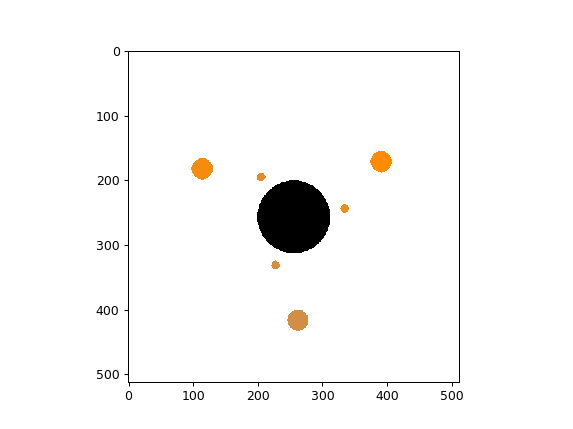

In [163]:
from matplotlib import colors

r,g,b,a = colors.to_rgba('cornflowerblue')
r2,g2,b2,a2 = colors.to_rgba('darkorange')


cdict2 = {'red':   ((0.0, 0.0, 0.0),
                   (0.5,r,r),
                   (1.0, r2, r2)),

         'green': ((0.0, 0.0, 0.0),
                   (0.5, g, g),
                   (1.0, g2, g2)),

         'blue':  ((0.0, 0.0, 0.0),
                   (0.5, b, b),
                   (1.0, b2, b2))
        }

from matplotlib.colors import LinearSegmentedColormap
blue_red1 = LinearSegmentedColormap('BlueRed1', cdict2)

plt.register_cmap(cmap=blue_red1)
cmap1 = plt.get_cmap('BlueRed1')

plt.figure()
plt.imshow(im3,cmap=cmap1)

In [164]:
plt.close('all')

<IPython.core.display.Javascript object>


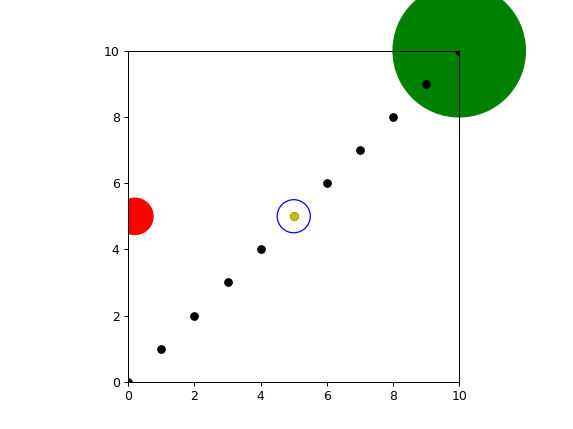

Text(0, 0.5, '[cm]')

In [165]:
ii = 1

offset = 0

first_radius = 5 - offset
second_radius = 2.5 - offset

correction = 0
# CTMAT(x) formel=H2O dichte=x
LEN = 100

A0  = 87.7082*np.pi/180 + correction
A1 = 108.3346*np.pi/180 + correction
A2 = 126.6693*np.pi/180 + correction
A3 = 142.7121*np.pi/180 + correction
A4 = 156.4631*np.pi/180 + correction
A5 = 167.9223*np.pi/180 + correction
A6 = 177.0896*np.pi/180 + correction
A7 = 183.9651*np.pi/180 + correction
A8 = 188.5487*np.pi/180 + correction

B0 = 110.6265*np.pi/180 + correction
B1 = 142.7121*np.pi/180 + correction
B2 = 165.6304*np.pi/180 + correction
B3 = 179.3814*np.pi/180 + correction

tad = 0.2 

circle2 = plt.Circle((first_radius*cos(A0),first_radius*sin(A0)),radius=-tad + 0.75, fill=False)

short_name = ['Lung','Compact','Cortical','Adipose','Brain','B-100']


fig, ax = plt.subplots()

# plt.imshow(im3,cmap=cmap1,extent=[-8,8,-8,8])
plt.axis([-8, 8, -8,8])
# Phantom 
# ++++ module body ++++++++++++++++++++++++++++++++++++++++++++++++++ */                        
circle1 = plt.Circle((0.000,0.000),radius=-tad + 2,fill=False);ax.add_artist(circle1)

ii += 1

# ++++ supra-slice 1.0% targets +++++++++++++++++++++++++++++++++++++++ */
ax.add_artist(circle2)

# ++++ supra-slice 0.3% targets +++++++++++++++++++++++++++++++++++++++ */
circle1 = plt.Circle((first_radius*cos(A0+2/3*np.pi),first_radius*sin(A0+2/3*np.pi)),radius=-tad + 0.75, fill=False);ax.add_artist(circle1)

# ++++ supra-slice 0.5% targets +++++++++++++++++++++++++++++++++++++++ */
circle1 = plt.Circle((first_radius*cos(A0+4/3*np.pi),first_radius*sin(A0+4/3*np.pi)),radius=-tad + 0.75, fill=False);ax.add_artist(circle1)

# ++++ subslice 1.0% targets 7mm long +++++++++++++++++++++++++++++++++ */
circle1 = plt.Circle((second_radius*cos(B0),second_radius*sin(B0)),radius=-tad + 0.45, fill=False);ax.add_artist(circle1)

# ++++ subslice 1.0% targets 3mm long +++++++++++++++++++++++++++++++++ */
circle1 = plt.Circle((second_radius*cos(B0+2/3*np.pi) ,second_radius*sin(B0+2/3*np.pi)),radius=-tad + 0.45, fill=False  );ax.add_artist(circle1)

# ++++ subslice 1.0% targets 5mm long +++++++++++++++++++++++++++++++++ */
circle1 = plt.Circle((second_radius*cos(B0+4/3*np.pi) ,second_radius*sin(B0+4/3*np.pi)),radius=-tad + 0.45, fill=False  );ax.add_artist(circle1)

ii = 0

circle1 = plt.text(0.6 +first_radius*cos(A0),first_radius*sin(A0),short_name[ii],color='darkorange');ax.add_artist(circle1)

ii += 1
circle1 = plt.text(0.4 +first_radius*cos(A0+2/3*np.pi),first_radius*sin(A0+2/3*np.pi) + 0.7,short_name[ii],color='darkorange');ax.add_artist(circle1)
ii += 1

# ++++ supra-slice 0.5% targets +++++++++++++++++++++++++++++++++++++++ */
circle1 = plt.text(0.6 +first_radius*cos(A0+4/3*np.pi),first_radius*sin(A0+4/3*np.pi),short_name[ii],color='darkorange');ax.add_artist(circle1)
ii += 1

# ++++ subslice 1.0% targets 7mm long +++++++++++++++++++++++++++++++++ */
circle1 = plt.text(0.4 +second_radius*cos(B0),second_radius*sin(B0),short_name[ii],color='darkorange');ax.add_artist(circle1)
ii += 1

# ++++ subslice 1.0% targets 3mm long +++++++++++++++++++++++++++++++++ */
circle1 = plt.text(0.4 +second_radius*cos(B0+2/3*np.pi) ,second_radius*sin(B0+2/3*np.pi)-0.6,short_name[ii],color='darkorange');ax.add_artist(circle1)
ii += 1

# ++++ subslice 1.0% targets 5mm long +++++++++++++++++++++++++++++++++ */
circle1 = plt.text(0.4 +second_radius*cos(B0+4/3*np.pi) ,second_radius*sin(B0+4/3*np.pi),short_name[ii],color='darkorange');ax.add_artist(circle1)

plt.imshow(np.flipud(imfc),cmap='bone',extent=[-8,8,-8,8])
plt.xlabel('[cm]');plt.ylabel('[cm]')

In [166]:


circle1 = plt.Circle((first_radius*cos(A0),first_radius*sin(A0)),radius=-tad + 0.75,color='r')
# now make a circle with no fill, which is good for hi-lighting key results
circle2 = plt.Circle((5, 5), 0.5, color='b', fill=False)
circle3 = plt.Circle((10, 10), 2, color='g', clip_on=False)

ax = plt.gca()
ax.cla() # clear things for fresh plot

# change default range so that new circles will work
ax.set_xlim((0, 10))
ax.set_ylim((0, 10))
# some data
ax.plot(range(11), 'o', color='black')
# key data point that we are encircling
ax.plot((5), (5), 'o', color='y')

ax.add_artist(circle1)
ax.add_artist(circle2)
ax.add_artist(circle3)
fig.savefig('plotcircles2.png')

<IPython.core.display.Javascript object>


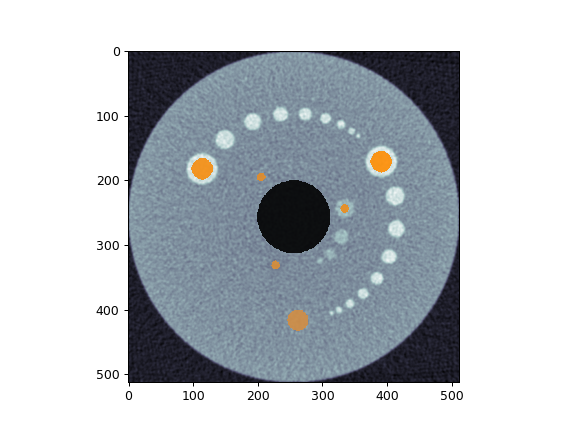

In [167]:
plt.figure()
import copy

my_cmap = copy.copy(cmap1) # get a copy of the gray color map
my_cmap.set_bad(alpha=0)

plt.imshow(imfc,cmap='bone')
plt.imshow(im3,cmap=my_cmap,alpha=0.9)

In [168]:
# plt.savefig('inserts_for_magdalena')

In [169]:
# im = topas.T[32]

# plt.figure()
# plt.subplot(121)
# plt.imshow(im2)
# plt.subplot(122)
# plt.imshow(im)

In [170]:
def radial_profile(data, center):
    y, x = np.indices((data.shape))
    r = np.sqrt((x - center[0])**2 + (y - center[1])**2)
    r = r.astype(np.int)

    tbin = np.bincount(r.ravel(), data.ravel())
    nr = np.bincount(r.ravel())
    radialprofile = tbin / nr
    return radialprofile 

0.0056376997
0.05659316


<IPython.core.display.Javascript object>


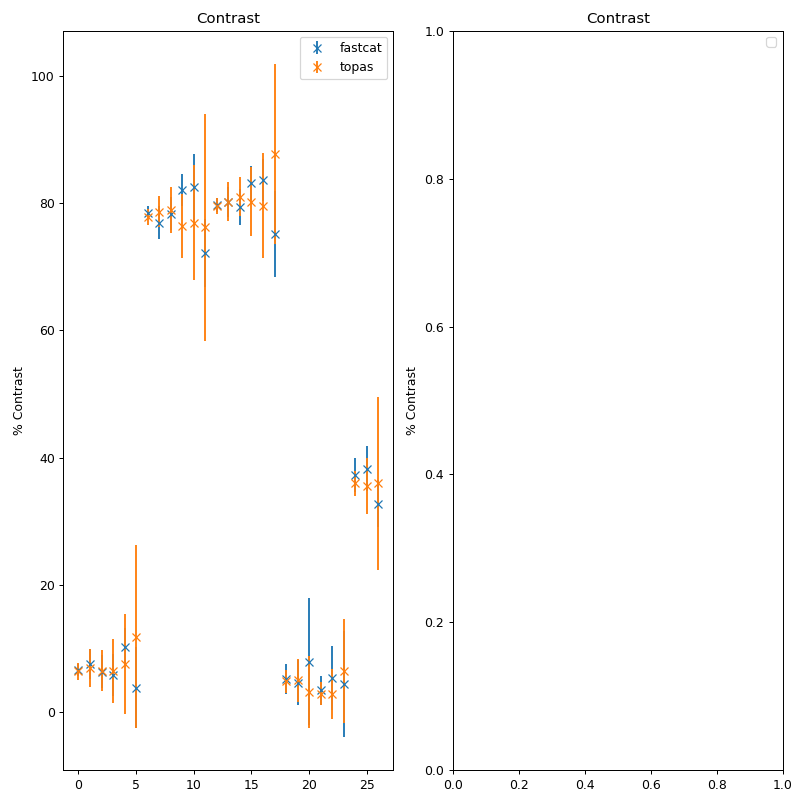

No handles with labels found to put in legend.


In [171]:
CNRs2 = analyse_515_8cm(topas.T[32])
CNRs1 = analyse_515(fastCat[5])

fig = plt.figure(figsize=[9,9])

subfig9 = fig.add_subplot(121)
subfig10 = fig.add_subplot(122)

phan_map = ['air','water','G4_LUNG_ICRP',"G4_BONE_COMPACT_ICRU","G4_BONE_CORTICAL_ICRP","G4_ADIPOSE_TISSUE_ICRP","G4_BRAIN_ICRP","G4_B-100_BONE"]

subfig9.errorbar(np.arange(len(CNRs1[1])),CNRs1[1],yerr=CNRs1[3],fmt= 'x',label='fastcat') #abel=f'{det.get()}, {load.get()}')
# subfig9.set_xticks(range(len(CNRs1))) 
# subfig9.set_xticklabels(phan_map[2:], fontsize=12, rotation = 75)
subfig9.set_ylabel('% Contrast')
subfig9.set_title('Contrast')

subfig9.errorbar(np.arange(len(CNRs2[1])),CNRs2[1],yerr=CNRs2[3],fmt= 'x',label='topas')#abel=f'{det.get()}, {load.get()}')
# subfig10.set_xticks(range(len(CNRs1))) 
# subfig10.set_xticklabels(phan_map[2:], fontsize=12, rotation = 75)
subfig9.legend()
subfig10.set_ylabel('% Contrast')
subfig10.set_title('Contrast')

plt.legend()
fig.tight_layout()
  

In [173]:
np.array(CNRs1[3])[inds_i_want]

array([0.9709262 , 0.99454352, 1.09476721, 2.3953809 , 2.30138574,
       2.64928451])

0.0056376997
0.05659316


<IPython.core.display.Javascript object>


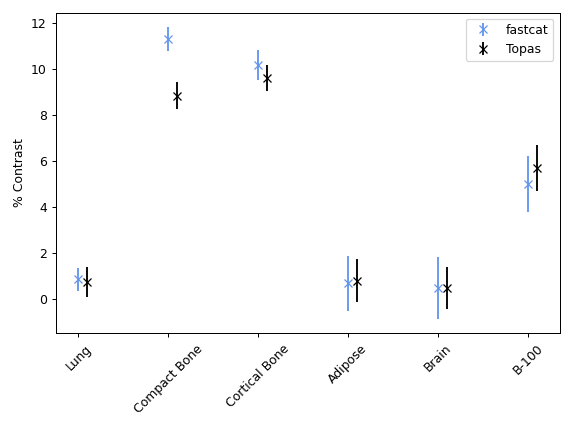

In [174]:
CNRs2 = analyse_515_8cm(topas.T[32])
CNRs1 = analyse_515(fastCat[5])

fig = plt.figure()

subfig9 = fig.add_subplot(111)
# subfig10 = fig.add_subplot(122)

inds_i_want = [0,6,12,18,21,24]
phan_map = ['air','water','G4_LUNG_ICRP',"G4_BONE_COMPACT_ICRU","G4_BONE_CORTICAL_ICRP","G4_ADIPOSE_TISSUE_ICRP","G4_BRAIN_ICRP","G4_B-100_BONE"]

subfig9.set_xticks(range(len(inds_i_want))) 

shorts = ['Lung','Compact Bone','Cortical Bone','Adipose','Brain','B-100']
subfig9.set_xticklabels(shorts, fontsize=10, rotation = 45)
subfig9.set_ylabel('% Contrast')
# subfig9.set_title('Contrast')
subfig9.errorbar(np.arange(len(inds_i_want)),np.array(CNRs1[2])[inds_i_want],yerr=np.array(CNRs1[3])[inds_i_want]/2,fmt= 'x',label='fastcat',color='cornflowerblue') #abel=f'{det.get()}, {load.get()}')
subfig9.errorbar(np.arange(len(inds_i_want))+0.1,np.array(CNRs2[2])[inds_i_want],yerr=np.array(CNRs2[3])[inds_i_want]/2,fmt= 'x',label='Topas',color='k')#abel=f'{det.get()}, {load.get()}')

# subfig10.set_xticks(range(len(CNRs1))) 
# subfig10.set_xticklabels(phan_map[2:], fontsize=12, rotation = 75)
subfig9.legend()
# subfig10.set_ylabel('% Contrast')
# subfig10.set_title('Contrast')

plt.legend()
fig.tight_layout()

<IPython.core.display.Javascript object>


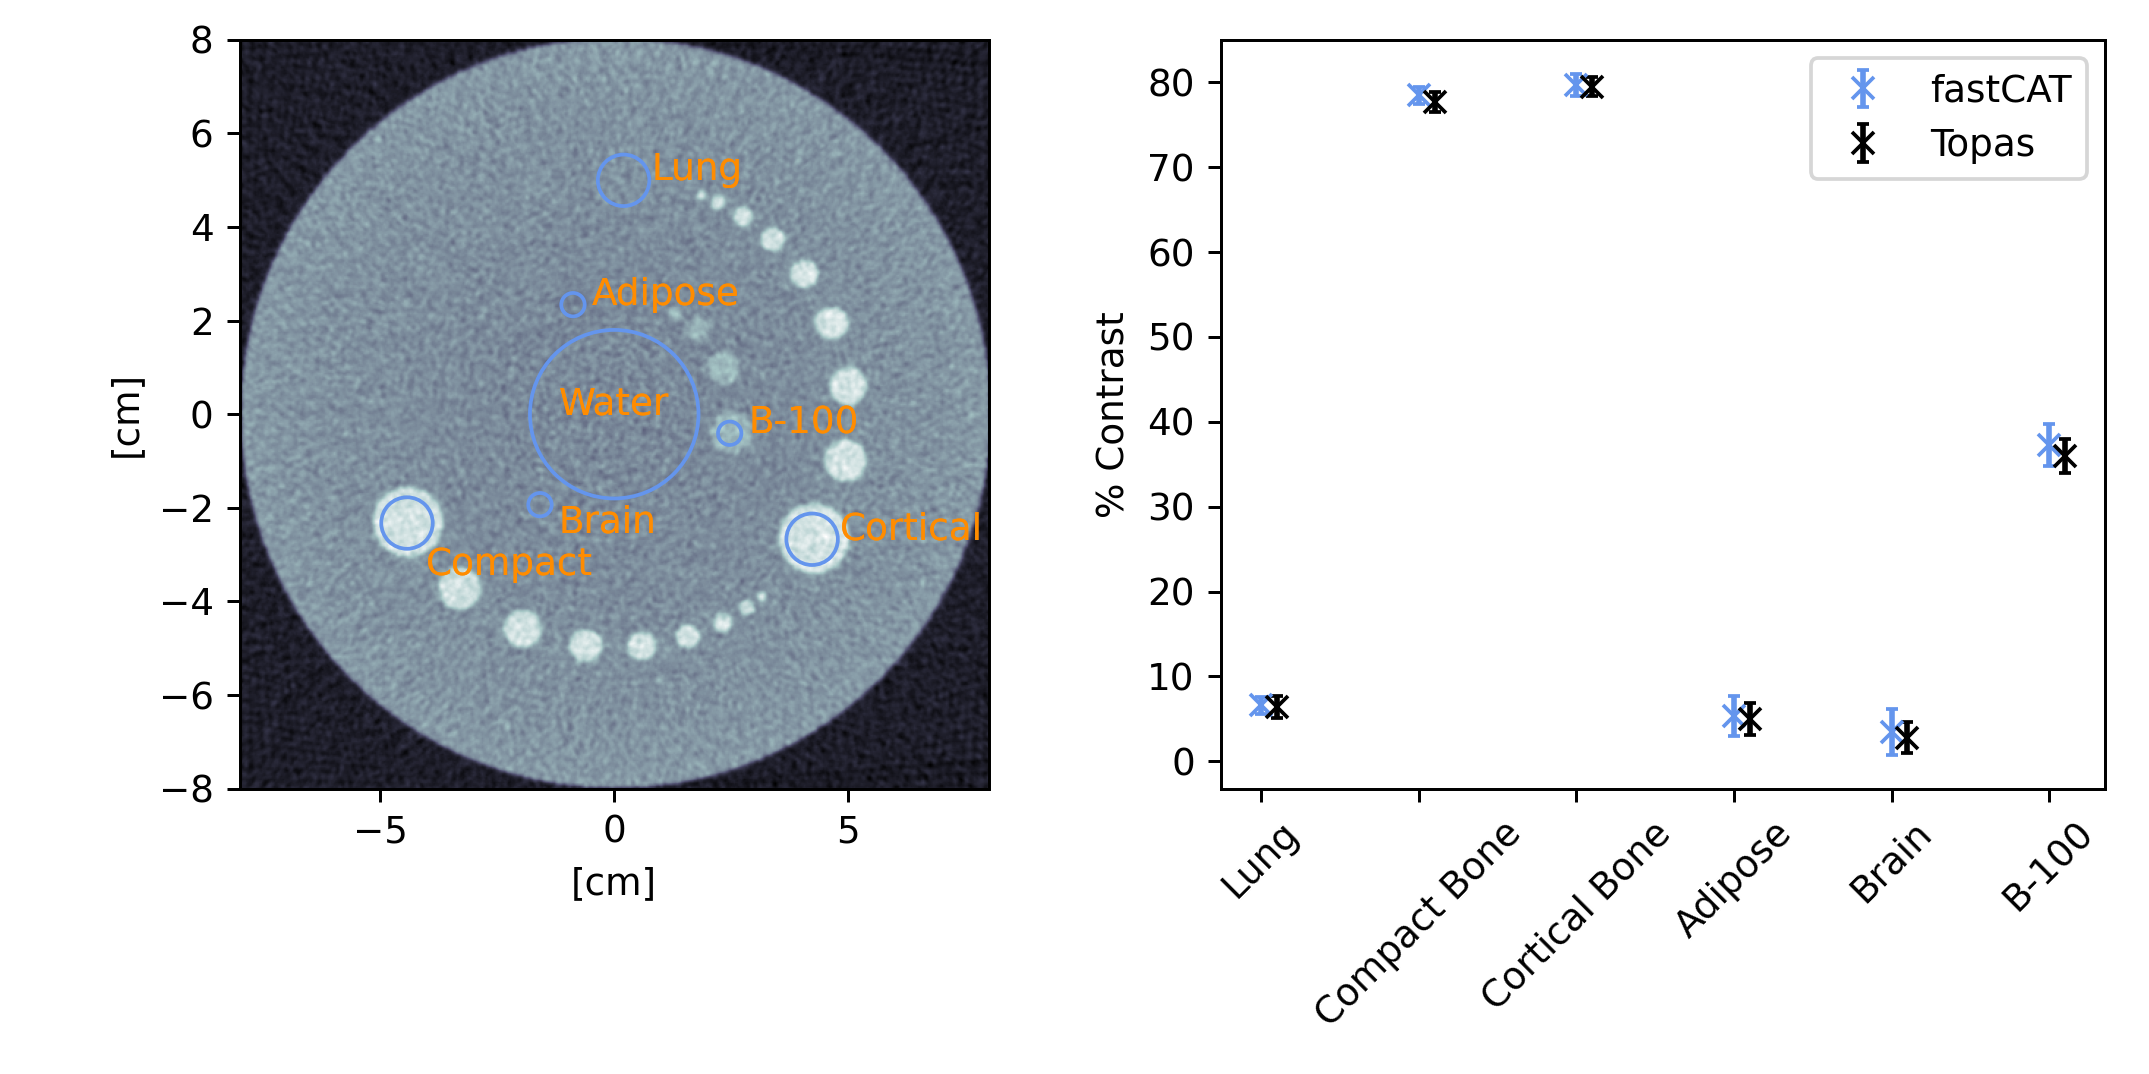

In [175]:
fig = plt.figure(dpi=300,figsize=[8,4])

subfig9 = fig.add_subplot(122)
# subfig10 = fig.add_subplot(122)

inds_i_want = [0,6,12,18,21,24]
phan_map = ['air','water','G4_LUNG_ICRP',"G4_BONE_COMPACT_ICRU","G4_BONE_CORTICAL_ICRP","G4_ADIPOSE_TISSUE_ICRP","G4_BRAIN_ICRP","G4_B-100_BONE"]

subfig9.set_xticks(range(len(inds_i_want))) 


ww = 0.085

shorts = ['Lung','Compact Bone','Cortical Bone','Adipose','Brain','B-100']
subfig9.set_xticklabels(shorts, fontsize=10, rotation = 45)
subfig9.set_ylabel('% Contrast')
# subfig9.set_title('Contrast')
# subfig9.bar(np.arange(len(inds_i_want)),np.array(CNRs1[1])[inds_i_want],width = ww,capsize = ww+3,ecolor ='darkorange', yerr=np.array(CNRs1[3])[inds_i_want],label='fastcat',color='cornflowerblue') #abel=f'{det.get()}, {load.get()}')
# subfig9.bar(np.arange(len(inds_i_want))+0.1,np.array(CNRs2[1])[inds_i_want],capsize = ww+3,width = ww,ecolor ='darkorange',yerr=np.array(CNRs2[3])[inds_i_want],label='Topas',color='k')#abel=f'{det.get()}, {load.get()}')
subfig9.errorbar(np.arange(len(inds_i_want)),np.array(CNRs1[1])[inds_i_want],fmt='x',capsize = ww+1.5, yerr=np.array(CNRs1[3])[inds_i_want],label='fastCAT',color='cornflowerblue') #abel=f'{det.get()}, {load.get()}')
subfig9.errorbar(np.arange(len(inds_i_want))+0.1,np.array(CNRs2[1])[inds_i_want],fmt='x',capsize = ww+1.5,yerr=np.array(CNRs2[3])[inds_i_want],label='Topas',color='k')#abel=f'{det.get()}, {load.get()}')

# subfig10.set_xticks(range(len(inds_i_want))) 
# subfig10.set_xticklabels(phan_map[2:], fontsize=12, rotation = 75)
subfig10.set_ylabel('% Contrast')
subfig10.set_title('Contrast')

subfig9.legend()
# subfig10.set_ylabel('% Contrast')
# subfig10.set_title('Contrast')

plt.legend()

ax = fig.add_subplot(121)

offset = 0

first_radius = 5 - offset
second_radius = 2.5 - offset

correction = 0
# CTMAT(x) formel=H2O dichte=x
LEN = 100

A0  = 87.7082*np.pi/180 + correction
A1 = 108.3346*np.pi/180 + correction
A2 = 126.6693*np.pi/180 + correction
A3 = 142.7121*np.pi/180 + correction
A4 = 156.4631*np.pi/180 + correction
A5 = 167.9223*np.pi/180 + correction
A6 = 177.0896*np.pi/180 + correction
A7 = 183.9651*np.pi/180 + correction
A8 = 188.5487*np.pi/180 + correction

B0 = 110.6265*np.pi/180 + correction
B1 = 142.7121*np.pi/180 + correction
B2 = 165.6304*np.pi/180 + correction
B3 = 179.3814*np.pi/180 + correction

tad = 0.2 

circle2 = plt.Circle((first_radius*cos(A0),first_radius*sin(A0)),radius=-tad + 0.75, fill=False,color = 'cornflowerblue')

short_name = ['Lung','Compact','Cortical','Adipose','Brain','B-100']


# fig, ax = plt.subplots()

# plt.imshow(im3,cmap=cmap1,extent=[-8,8,-8,8])
plt.axis([-8, 8, -8,8])
# Phantom 
# ++++ module body ++++++++++++++++++++++++++++++++++++++++++++++++++ */                        
circle1 = plt.Circle((0.000,0.000),radius=-tad + 2,fill=False,color = 'cornflowerblue');ax.add_artist(circle1)

ii += 1

# ++++ supra-slice 1.0% targets +++++++++++++++++++++++++++++++++++++++ */
ax.add_artist(circle2)

# ++++ supra-slice 0.3% targets +++++++++++++++++++++++++++++++++++++++ */
circle1 = plt.Circle((first_radius*cos(A0+2/3*np.pi),first_radius*sin(A0+2/3*np.pi)),radius=-tad + 0.75, fill=False,color = 'cornflowerblue');ax.add_artist(circle1)

# ++++ supra-slice 0.5% targets +++++++++++++++++++++++++++++++++++++++ */
circle1 = plt.Circle((first_radius*cos(A0+4/3*np.pi),first_radius*sin(A0+4/3*np.pi)),radius=-tad + 0.75, fill=False,color = 'cornflowerblue');ax.add_artist(circle1)

# ++++ subslice 1.0% targets 7mm long +++++++++++++++++++++++++++++++++ */
circle1 = plt.Circle((second_radius*cos(B0),second_radius*sin(B0)),radius=-tad + 0.45, fill=False,color = 'cornflowerblue');ax.add_artist(circle1)

# ++++ subslice 1.0% targets 3mm long +++++++++++++++++++++++++++++++++ */
circle1 = plt.Circle((second_radius*cos(B0+2/3*np.pi) ,second_radius*sin(B0+2/3*np.pi)),radius=-tad + 0.45, fill=False,color = 'cornflowerblue'  );ax.add_artist(circle1)

# ++++ subslice 1.0% targets 5mm long +++++++++++++++++++++++++++++++++ */
circle1 = plt.Circle((second_radius*cos(B0+4/3*np.pi) ,second_radius*sin(B0+4/3*np.pi)),radius=-tad + 0.45, fill=False,color = 'cornflowerblue'  );ax.add_artist(circle1)

ii = 0

circle1 = plt.text(0,0,'Water',color='darkorange',ha='center');ax.add_artist(circle1)

circle1 = plt.text(0.6 +first_radius*cos(A0),first_radius*sin(A0),short_name[ii],color='darkorange');ax.add_artist(circle1)

ii += 1
circle1 = plt.text(0.4 +first_radius*cos(A0+2/3*np.pi),first_radius*sin(A0+2/3*np.pi) - 1.1,short_name[ii],color='darkorange');ax.add_artist(circle1)
ii += 1

# ++++ supra-slice 0.5% targets +++++++++++++++++++++++++++++++++++++++ */
circle1 = plt.text(0.6 +first_radius*cos(A0+4/3*np.pi),first_radius*sin(A0+4/3*np.pi),short_name[ii],color='darkorange');ax.add_artist(circle1)
ii += 1

# ++++ subslice 1.0% targets 7mm long +++++++++++++++++++++++++++++++++ */
circle1 = plt.text(0.4 +second_radius*cos(B0),second_radius*sin(B0),short_name[ii],color='darkorange');ax.add_artist(circle1)
ii += 1

# ++++ subslice 1.0% targets 3mm long +++++++++++++++++++++++++++++++++ */
circle1 = plt.text(0.4 +second_radius*cos(B0+2/3*np.pi) ,second_radius*sin(B0+2/3*np.pi)-0.6,short_name[ii],color='darkorange');ax.add_artist(circle1)
ii += 1

# ++++ subslice 1.0% targets 5mm long +++++++++++++++++++++++++++++++++ */
circle1 = plt.text(0.4 +second_radius*cos(B0+4/3*np.pi) ,second_radius*sin(B0+4/3*np.pi),short_name[ii],color='darkorange');ax.add_artist(circle1)

plt.imshow(np.flipud(imfc),cmap='bone',extent=[-8,8,-8,8])
plt.xlabel('[cm]');plt.ylabel('[cm]')

fig.tight_layout()


In [176]:
#plt.savefig('/home/xcite/fastcat_paper/figures/contrast.pdf')

<IPython.core.display.Javascript object>


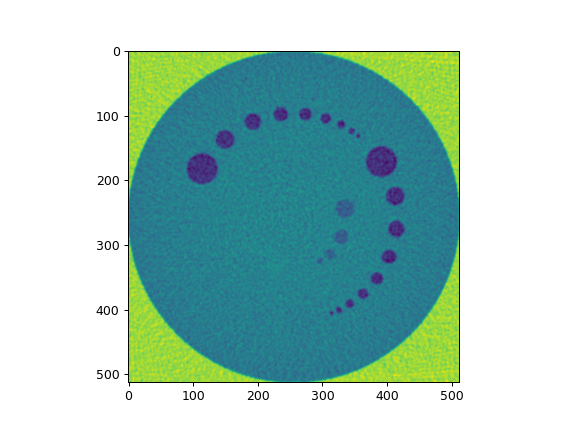

In [177]:
plt.figure()
plt.imshow(topas.T[32]-fastCat[5])

In [178]:
astd = []

astd.append(np.std(CNRs1[1][:8]))
astd.append(np.std(CNRs1[1][8:16]))
astd.append(np.std(CNRs1[1][16:24]))
astd.append(np.std(CNRs1[1][24:28]))
astd.append(np.std(CNRs1[1][28:32]))
astd.append(np.std(CNRs1[1][32:36]))
         
a2std = []

a2std.append(np.std(CNRs2[1][:8]))
a2std.append(np.std(CNRs2[1][8:16]))
a2std.append(np.std(CNRs2[1][16:24]))
a2std.append(np.std(CNRs2[1][24:28]))
a2std.append(np.std(CNRs2[1][28:32]))
a2std.append(np.std(CNRs2[1][32:36]))

/home/xcite/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/xcite/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:195: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/home/xcite/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [179]:
np.mean = np.nanmean

In [180]:
a = []

a.append(np.mean(CNRs1[1][:8]))
a.append(np.mean(CNRs1[1][8:16]))
a.append(np.mean(CNRs1[1][16:24]))
a.append(np.mean(CNRs1[1][24:28]))
a.append(np.mean(CNRs1[1][28:32]))
a.append(np.mean(CNRs1[1][32:36]))
         
a2 = []

a2.append(np.mean(CNRs2[1][:8]))
a2.append(np.mean(CNRs2[1][8:16]))
a2.append(np.mean(CNRs2[1][16:24]))
a2.append(np.mean(CNRs2[1][24:28]))
a2.append(np.mean(CNRs2[1][28:32]))
a2.append(np.mean(CNRs2[1][32:36]))

/home/xcite/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys
/home/xcite/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: Mean of empty slice
  
/home/xcite/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: Mean of empty slice
  app.launch_new_instance()
/home/xcite/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: Mean of empty slice


<IPython.core.display.Javascript object>


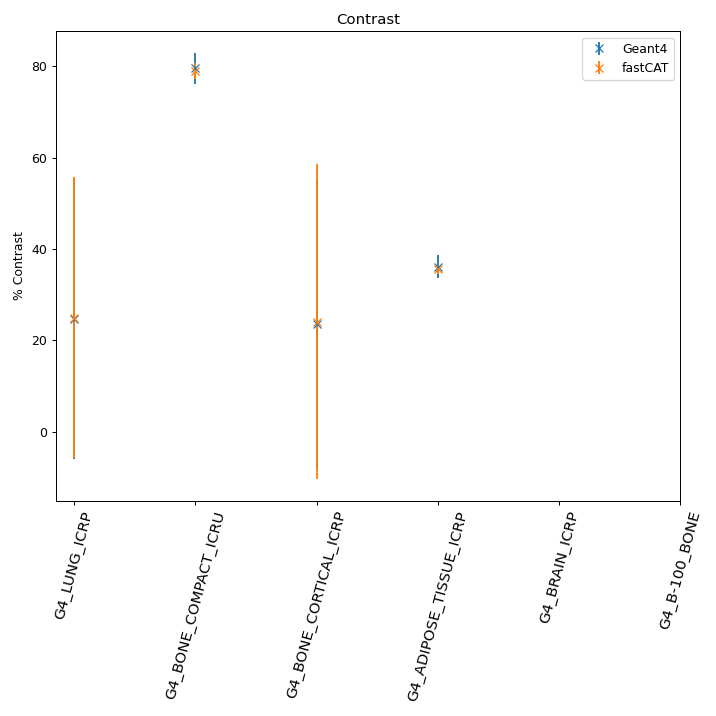

In [181]:
fig = plt.figure(figsize=[8,8])

subfig9 = fig.add_subplot(111)
# subfig10 = fig.add_subplot(122)

In [182]:
phan_map = ['air','water','G4_LUNG_ICRP',"G4_BONE_COMPACT_ICRU","G4_BONE_CORTICAL_ICRP","G4_ADIPOSE_TISSUE_ICRP","G4_BRAIN_ICRP","G4_B-100_BONE"]

subfig9.errorbar(np.arange(len(a)),a,astd,fmt= 'x',label='Geant4') #abel=f'{det.get()}, {load.get()}')
# subfig9.set_xticks(range(len(CNRs1))) 
# subfig9.set_xticklabels(phan_map[2:], fontsize=12, rotation = 75)
subfig9.set_ylabel('% Contrast')
subfig9.set_title('Contrast')

subfig9.errorbar(np.arange(len(a2)),a2,a2std,fmt= 'x',label='fastCAT')#abel=f'{det.get()}, {load.get()}')
subfig9.set_xticks(range(len(a))) 
subfig9.set_xticklabels(phan_map[2:], fontsize=12, rotation = 75)
subfig9.set_ylabel('% Contrast')
subfig9.set_title('Contrast')
subfig9.legend()

fig.tight_layout()
  

In [183]:
plt.savefig('Contrast_comparison_w_legend')